<a href="https://colab.research.google.com/github/PritamWarule/Student_Score-Prediction/blob/main/Students_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression using Python Scikit Learn

In this notebbok we wiil build simple machine learning model (Simple Linear Regression) to predicts the students score based on number of hours of study using python and Scikit learn library.

## Simple Linear Regression

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression

In [4]:
#Importing the data
students_data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
students_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Analysis

In [5]:
students_data.shape

(25, 2)

In [6]:
students_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
students_data.isnull().any()

Hours     False
Scores    False
dtype: bool

In [8]:
students_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualization

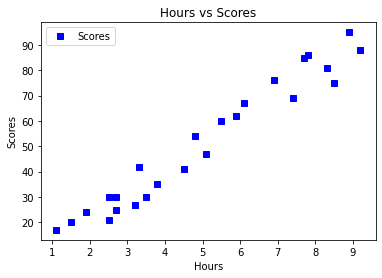

In [10]:
students_data.plot(x='Hours', y='Scores',style='bs') 
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()
plt.show()

from the graph above, we can conclude that there is a positive or direct linear relation between the number of hours studied and percentage of score.

## Preparation of data for building model

Dividing the data into attributes and labels

In [13]:
X = students_data.iloc[:, :-1].values  
y = students_data.iloc[:, 1].values  

Splitting the data into training and test sets using Scikit-Learns built in train_test_split() method 
80 % of data is used for training and remaining 20% is used for testing

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Training the algorithm

In [14]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# intercept and coefficient
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434662
[9.91065648]


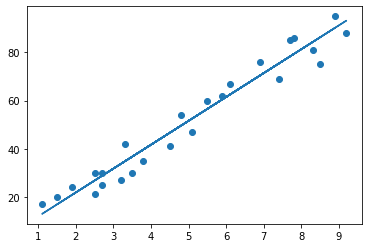

In [16]:
# Plotting the regression line
regression_line = regressor.coef_*X+regressor.intercept_     # Y=mX+C

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, regression_line);
plt.show()

## Making predictions

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
# Predicting the score
hours = [[9.15]]
my_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(my_pred[0]))

No of Hours = [[9.15]]
Predicted Score = 92.70066683931117


## Evaluating the model

We have choosen mean square error for evaluation

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
